<a href="https://colab.research.google.com/github/ParneUshaChandanaReddy/TextClassifier_News/blob/main/News_Category_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':'1mhyBONtfkLT8OkOt85CfTpiMDU8nolg3'}) # replace the id with id of file you want to access
downloaded.GetContentFile('News_Category_Dataset.json') 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# get nltk data
nltk.download('stopwords')
nltk.download('wordnet')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [6]:
# load dataset
news_df = pd.read_json('News_Category_Dataset.json', lines=True)
news_df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


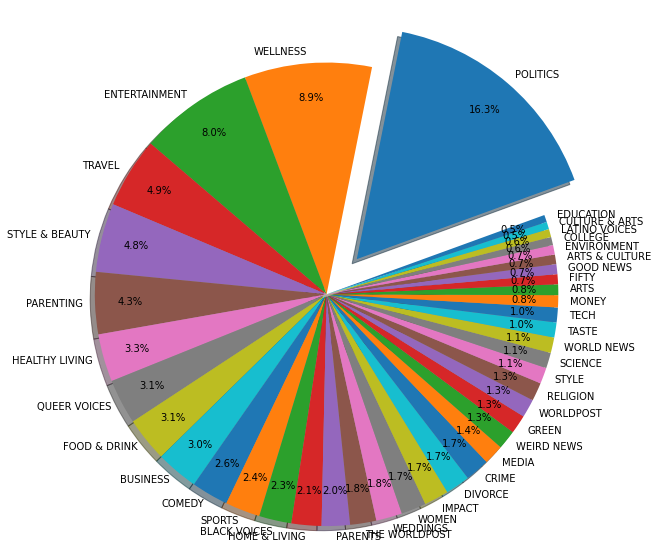

In [7]:
plt.figure(figsize=(10,10))
sizes = news_df.category.value_counts().values
labels = news_df.category.value_counts().index
plt.pie(sizes, labels=labels, autopct='%.1f%%',
        shadow=True, pctdistance=0.85, labeldistance=1.05, startangle=20, 
        explode = [0 if i > 0 else 0.2 for i in range(len(sizes))])
plt.axis('equal')
plt.show()

In [8]:
# print unique categories
print(news_df.category.unique())

['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'WELLNESS' 'PARENTING' 'HOME & LIVING' 'STYLE & BEAUTY' 'DIVORCE'
 'WEDDINGS' 'FOOD & DRINK' 'MONEY' 'ENVIRONMENT' 'CULTURE & ARTS']


In [35]:
news_df.isna().sum()

category       0
text           0
category_id    0
dtype: int64

In [41]:
df_orignial = news_df.copy()

In [42]:
import nltk
print('NTLK version: %s' % (nltk.__version__))

from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')

NTLK version: 3.2.5
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [58]:
df_orignial['category'] = df_orignial['category'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
df_orignial.category.head(7)

0    [C, R, I, M, E]
1    [W, O, R, L, D]
2    [W, O, R, L, D]
3    [C, R, I, M, E]
4    [C, R, I, M, E]
5    [C, R, I, M, E]
6    [W, O, R, L, D]
Name: category, dtype: object

In [60]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [62]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
example_sent = "This is a sample sentence, showing off the stop words filtration."
  
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(example_sent) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
print(word_tokens) 
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


In [9]:
# combining some raw data categories that are very close
news_df.category = news_df.category.map(
    lambda x: "WORLD" if x == "WORLDPOST" or x == "THE WORLDPOST" or x == 'WORLD NEWS' else x)
news_df.category = news_df.category.map(
    lambda y: "ARTS & CULTURE" if y == "ARTS" or y == "ARTS & CULTURE" else y)
news_df.category = news_df.category.map(
    lambda z: "EDUCATION" if z == "EDUCATION" or z == "COLLEGE" else z)
news_df.category = news_df.category.map(
    lambda d: "HEALTH" if d == "HEALTHY LIVING" else d)

# removing rows with description size less than 20
mask = news_df['short_description'].str.len() > 20
news_df = news_df.loc[mask]
# combines headline and short_description for the input
news_df['text'] = news_df.headline+" "+news_df.short_description
# replace empty values with NaN
news_df = news_df.replace("", np.NaN)
# drop rows with value as NaN
news_df.dropna(axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [11]:
# here v represents each category as an integer in the category_id column.
from io import StringIO
col = ['category', 'text']
# news_df = news_df.reindex(columns=col)


news_df = news_df[col]
news_df = news_df[pd.notnull(news_df['text'])]

news_df.columns = ['category', 'text']
news_df['category_id'] = news_df['category'].factorize()[0]
category_id_df = news_df[['category', 'category_id']
                         ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
# print(category_to_id)
news_df.head()

,category,text,category_id
0,CRIME,mass shooting texas last week tv left husban...,0
1,ENTERTAINMENT,smith join diplo nicky jam world cup official...,1
2,ENTERTAINMENT,hugh grant marries first time age actor longt...,1
3,ENTERTAINMENT,jim carrey blast castrato adam schiff democrat...,1
4,ENTERTAINMENT,julianna margulies us donald trump poop bag pi...,1


In [12]:
# set category column as an index
news_df = news_df.set_index("category")
news_df

,text,category_id
category,,
CRIME,mass shooting texas last week tv left husban...,0
ENTERTAINMENT,smith join diplo nicky jam world cup official...,1
ENTERTAINMENT,hugh grant marries first time age actor longt...,1
ENTERTAINMENT,jim carrey blast castrato adam schiff democrat...,1
ENTERTAINMENT,julianna margulies us donald trump poop bag pi...,1
...,...,...
TECH,good game possible dont think people play zyng...,14
TECH,google+ open teen safeguard part teen experien...,14
TECH,web war web war threaten rage considerable tim...,14


In [13]:
# drop some categories
news_df = news_df.drop(['IMPACT', 'QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES', 'FIFTY',
                        'WEIRD NEWS', 'ENTERTAINMENT', 'GREEN', 'GOOD NEWS', 'COMEDY', 'PARENTS', 'WOMEN',
                        'POLITICS', 'MEDIA'], axis=0)
news_df = news_df.replace("", np.NaN)
# drop rows with value as NaN
news_df.dropna(axis=0, inplace=True)

In [14]:
# reset the index,
news_df = news_df.reset_index("category")
news_df

,category,text,category_id
0,CRIME,mass shooting texas last week tv left husban...,0
1,WORLD,north korea still open talk trump cancel summi...,5
2,WORLD,thousand travel home ireland vote abortion acc...,5
3,CRIME,rachel dolezal face felony charge welfare frau...,0
4,CRIME,man face charge pulling knife stun gun muslim ...,0
...,...,...,...
79090,TECH,good game possible dont think people play zyng...,14
79091,TECH,google+ open teen safeguard part teen experien...,14
79092,TECH,web war web war threaten rage considerable tim...,14
79093,TECH,watch top youtube video week youre looking se...,14


In [15]:
category_id_df = news_df[['category', 'category_id']
                         ].sort_values('category_id')
category_to_id = dict(category_id_df.values)
print(category_to_id)

{'CRIME': 0, 'WORLD': 5, 'SPORTS': 10, 'BUSINESS': 11, 'TRAVEL': 12, 'TECH': 14, 'RELIGION': 15, 'SCIENCE': 17, 'EDUCATION': 18, 'ARTS & CULTURE': 20, 'STYLE': 21, 'TASTE': 23, 'HEALTH': 24, 'WELLNESS': 27, 'PARENTING': 28, 'HOME & LIVING': 29, 'STYLE & BEAUTY': 30, 'WEDDINGS': 31, 'FOOD & DRINK': 32, 'DIVORCE': 33, 'MONEY': 34, 'ENVIRONMENT': 35, 'CULTURE & ARTS': 36}


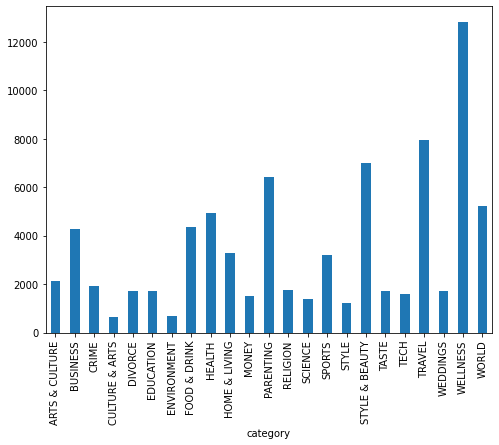

In [16]:
# ploting each category and corresponding no of samples - bar chart
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
news_df.groupby('category').text.count().plot.bar(ylim=0)
plt.show()


In [17]:
# to get the info about our preprocessed news dataframe
news_df.category.value_counts()

WELLNESS          12825
TRAVEL             7931
STYLE & BEAUTY     6994
PARENTING          6408
WORLD              5230
HEALTH             4941
FOOD & DRINK       4372
BUSINESS           4275
HOME & LIVING      3298
SPORTS             3189
ARTS & CULTURE     2117
CRIME              1942
RELIGION           1738
TASTE              1735
EDUCATION          1731
WEDDINGS           1702
DIVORCE            1695
TECH               1571
MONEY              1491
SCIENCE            1370
STYLE              1221
ENVIRONMENT         670
CULTURE & ARTS      649
Name: category, dtype: int64

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
d = news_df["text"].__iter__()
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(d)
labels = news_df.category_id
features.shape

(79095, 45313)

In [18]:
from sklearn.feature_selection import chi2
N = 2
for category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]

    print(f"{category}")
    nwline = '\n. '
    print(f"correlated unigrams:{nwline}{nwline.join(unigrams[-N:])}")
    print(f"correlated bigrams:{nwline}{nwline.join(bigrams[-N:])}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ARTS & CULTURE
correlated unigrams:
. art
. artist
correlated bigrams:
. handmaid tale
. first nighter
BUSINESS
correlated unigrams:
. company
. business
correlated bigrams:
. woman business
. wall st


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


CRIME
correlated unigrams:
. cop
. police
correlated bigrams:
. police said
. police say
CULTURE & ARTS
correlated unigrams:
. canvas
. imageblog
correlated bigrams:
. acrylic canvas
. oil canvas


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


DIVORCE
correlated unigrams:
. divorced
. divorce
correlated bigrams:
. child divorce
. divorce divorce
EDUCATION
correlated unigrams:
. college
. student
correlated bigrams:
. charter school
. higher education
ENVIRONMENT
correlated unigrams:
. keystone
. climate
correlated bigrams:
. climate change
. keystone xl


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


FOOD & DRINK
correlated unigrams:
. cocktail
. recipe
correlated bigrams:
. recipe make
. taste test


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


HEALTH
correlated unigrams:
. health
. zika
correlated bigrams:
. appeared quietrevcom
. gps guide


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


HOME & LIVING
correlated unigrams:
. craft
. home
correlated bigrams:
. home twitter
. craft day


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


MONEY
correlated unigrams:
. tax
. credit
correlated bigrams:
. credit card
. credit score


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


PARENTING
correlated unigrams:
. parent
. child
correlated bigrams:
. special need
. baby name
RELIGION
correlated unigrams:
. christian
. pope
correlated bigrams:
. personal spiritual
. daily meditation


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


SCIENCE
correlated unigrams:
. scientist
. nasa
correlated bigrams:
. solar system
. scientist say
SPORTS
correlated unigrams:
. player
. nfl
correlated bigrams:
. nfl player
. lebron james


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


STYLE
correlated unigrams:
. kendall
. jenner
correlated bigrams:
. gigi hadid
. kendall jenner


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


STYLE & BEAUTY
correlated unigrams:
. style
. fashion
correlated bigrams:
. huffpost style
. want sure
TASTE
correlated unigrams:
. delicious
. recipe
correlated bigrams:
. cooking cuff
. meal prep


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TECH
correlated unigrams:
. google
. apple
correlated bigrams:
. apple rumor
. video week


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TRAVEL
correlated unigrams:
. hotel
. travel
correlated bigrams:
. road trip
. national park


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


WEDDINGS
correlated unigrams:
. bride
. wedding
correlated bigrams:
. wedding planning
. wedding day


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


WELLNESS
correlated unigrams:
. cancer
. health
correlated bigrams:
. breast cancer
. health care
WORLD
correlated unigrams:
. refugee
. korea
correlated bigrams:
. prime minister
. north korea


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
# train the classifier
# Naive Bayes Classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB



In [20]:
train,test = train_test_split(news_df,test_size=0.15,random_state=42)

In [21]:
len(train)

67230

In [22]:
len(test)

11865

In [23]:
train2,val = train_test_split(train,test_size=0.15,random_state=42)

In [24]:
train2.head

<bound method NDFrame.head of              category                                               text  \
45224       PARENTING  parent blank check new college frosh going col...   
41661    FOOD & DRINK  guess freeze peanut butter edition probably do...   
8826           HEALTH  u life expectancy fall people die illness worr...   
69538        WELLNESS  diet type change quantity calorie burned study...   
18707           WORLD  report turkey enjoying med beach rest mid east...   
...               ...                                                ...   
40977  STYLE & BEAUTY   homemade beauty recipe dry skin rough heel cr...   
62238  STYLE & BEAUTY  prabal gurung target designer release limited ...   
70853        WELLNESS  hantavirus rare virus spread rodent kill  utah...   
6383            WORLD  india narendra modi use big political victory ...   
36584  STYLE & BEAUTY  budding beauty cannabis good skin cannabis ski...   

       category_id  
45224           28  
41661          

In [25]:
len(train2)

57145

In [26]:
len(val)

10085

In [27]:
x_train, x_test, y_train, y_test = train_test_split(news_df['text'],
                                                    news_df['category'],test_size=0.15, random_state=0)

In [28]:
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train)
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
clf = MultinomialNB().fit(x_train_tfidf, y_train)
# print(clf)

In [29]:
print(clf.predict(count_vect.transform([
    "Instagram updating content-banning policies on app"
])))

['STYLE & BEAUTY']


In [30]:
print(clf.predict(count_vect.transform([
    "Climate change poses mental health risks to children and teens"
])))

['WELLNESS']


In [31]:
print(clf.predict(count_vect.transform([
    "NASA scientist defends use of NUCLEAR weapons on asteroid"
])))

['SCIENCE']


In [32]:
print(clf.predict(count_vect.transform([
    """A ‘Haunted’ Hotel in Colorado Is Reopening With an Even Creepier Vibe  
    """
]
)))

['TRAVEL']


In [45]:

print(clf.predict(count_vect.transform([
    "discussing islam vs atheism"
]
)))

['WORLD']


In [33]:
print(clf.predict(count_vect.transform([

    "Champions League Final: Gary Lineker backs Liverpool to beat Tottenham in Madrid"

])))

['SPORTS']


In [41]:
# using multinomialNB
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(
    features, labels, news_df.index, test_size=0.15, random_state=0
)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [42]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_test, y_pred,
                                    target_names=news_df['category'].unique()))
print('accuracy %s' % accuracy_score(y_pred, y_test))

                precision    recall  f1-score   support

         CRIME       0.89      0.37      0.52       290
         WORLD       0.69      0.77      0.73       758
        SPORTS       0.93      0.55      0.69       485
      BUSINESS       0.59      0.32      0.41       638
        TRAVEL       0.56      0.83      0.67      1187
          TECH       0.94      0.07      0.14       206
      RELIGION       1.00      0.10      0.17       241
       SCIENCE       1.00      0.07      0.12       182
     EDUCATION       0.95      0.07      0.13       271
ARTS & CULTURE       0.86      0.08      0.14       307
         STYLE       1.00      0.01      0.01       187
         TASTE       1.00      0.01      0.02       282
        HEALTH       0.89      0.06      0.11       709
      WELLNESS       0.34      0.97      0.50      1948
     PARENTING       0.64      0.49      0.55       954
 HOME & LIVING       0.97      0.42      0.59       482
STYLE & BEAUTY       0.71      0.82      0.76  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
cross_val_score(MultinomialNB(),x_train,y_train, cv=5)

array([0.48661312, 0.49553771, 0.49881006, 0.4989588 , 0.48876989])